## Import necessary modules
Run this cell before running any other cells

In [22]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


.idea/# Printing and Logging
## Printing
You can use the **print()** function in Python to print messages to the screen. <br>
The message can be a string, or any other object, the object will be converted into a string before it is written to the screen. <br>

## Logging
You could use the logging module that is setup in *utils.py*. <br>
It prints to both your screen (standard output) as well as to log files (*ble.log*) in the *logs* directory. <br>
This is the recommended way to output messages, since the log files can help with debugging. <br>
The logging module also provides different log levels as shown below, each formatted with a different color for increased visibility. <br>

__**NOTE**__: You may notice that the DEBUG message is not printed to the screen but is printed in the log file. This is because the logging level for the screen is set to INFO and for the file is set to DEBUG. You can change the default log levels in *utils.py* (**STREAM_LOG_LEVEL** and **FILE_LOG_LEVEL**). 

## Formatting output
To format your strings, you may use %-formatting, str.format() or f-strings. <br>
The most "pythonic" way would be to use f-strings. [Here](https://realpython.com/python-f-strings/) is a good tutorial on f-strings. <br>

In [83]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2023-02-03 00:50:07,828 | INFO     |: info
2023-02-03 00:50:07,829 | WARNING  |: warning
2023-02-03 00:50:07,830 | ERROR    |: error
2023-02-03 00:50:07,831 | CRITICAL |: critical


<hr>

# BLE
## ArtemisBLEController
The class **ArtemisBLEController** (defined in *ble.py*) provides member functions to handle various BLE operations to send and receive data to/from the Artemis board, provided the accompanying Arduino sketch is running on the Artemis board. <br>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Functions</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">reload_config()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Reload changes made in <em>connection.yaml.</em></span></th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">connect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Connect to the Artemis board, whose MAC address is specified in <em>connection.yaml</em>.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">disconnect()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Disconnect from the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">is_connected()</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Return a boolean indicating whether your controller is connected to the Artemis board or not.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">send_command(cmd_type, data)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Send the command <strong>cmd_type</strong> (integer) with <strong>data</strong> (string) to the Artemis board.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">receive_float(uuid) <br> receive_string(uuid) <br> receive_int(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Read the GATT characteristic (specified by its <strong>uuid</strong>) of type float, string or int. <br> The type of the GATT
            characteristic is determined by the classes BLEFloatCharacteristic, BLECStringCharacteristic or
            BLEIntCharacteristic in the Arduino sketch.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">start_notify(uuid, notification_handler)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Activate notifications on the GATT characteristic (specified by its <strong>uuid</strong>). <br> <strong>notification_handler</strong> is a
            function callback which must accept two inputs; the first will be a uuid string object and the second will
            be the bytearray of the characteristic value.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">bytearray_to_float(byte_array) <br> bytearray_to_string(byte_array) <br> bytearray_to_int(byte_array)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Convert the <strong>bytearray</strong> to float, string or int, respectively. <br> You may use these functions inside your
            notification callback function.</span></th>
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">stop_notify(uuid)</span></th>
        <th style="text-align: left"><span style="font-weight: normal">Stop notifications on the GATT characteristic (specified by its <strong>uuid</strong>).</span></th>
    </tr>
</table>

<table align="left">
     <tr>
        <th style="text-align: left; font-size: medium">Member Variables</th>
        <th style="text-align: left; font-size: medium">Description</th style="text-align: left">
    </tr>
    <tr>
        <th style="text-align: left"><span style="color:rgb(201,152,4);font-family:monospace">uuid</span></th>
        <th style="text-align: left"><span style="font-weight: normal">A dictionary that stores the UUIDs of the various characteristics specified in <em>connection.yaml</em>.</span></th>
    </tr>
</table>

## Configuration
- The MAC address, Service UUID and GATT characteristic UUIDs are defined in the file: *connection.yaml*.
- They should match the UUIDs used in the Arduino sketch.
- The artemis board running the base code should display its MAC address in the serial monitor.
- Update the **artemis_address** in *connection.yaml*, accordingly.
- Make sure to call **ble.reload_config()** or **get_ble_controller()** (which internally calls **reload_config()**) after making any changes to your configuration file.

<hr>

In the below cell, we create an **ArtemisBLEController** object using **get_ble_controller()** (defined in *ble.py*), which creates and/or returns a single instance of **ArtemisBLEController**. <br>
<span style="color:rgb(240,50,50)"> __NOTE__: Do not use the class directly to instantiate an object. </span><br>

In [23]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-02-03 00:59:26,678 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:10:69:2C:3C
2023-02-03 00:59:30,588 | INFO     |: Connected to C0:83:10:69:2C:3C


## Receive data from the Artemis board

The cell below shows examples of reading different types (as defined in the Arduino sketch) of GATT characteristics.

In [33]:
# Read a float GATT Charactersistic
f = ble.receive_float(ble.uuid['RX_FLOAT'])
print(f)

3.0


In [6]:
# Read a string GATT Charactersistic
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

[->9.0<-]


## Send a command to the Artemis board
Send the PING command and read the reply string from the string characteristic RX_STRING. <br>
__NOTE__: The **send_command()** essentially sends a string data to the GATT characteristic (TX_CMD_STRING). The GATT characteristic in the Arduino sketch is of type BLECStringCharacteristic.

In [4]:
ble.send_command(CMD.PING, "")

In [5]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


The cell below shows an example of the SEND_TWO_INTS command. <br> The two values in the **data** are separated by a delimiter "|". <br>
Refer Lab 2 documentation for more information on the command protocol.

In [9]:
ble.send_command(CMD.SEND_TWO_INTS, "2|-6")

The Artemis board should print the two integers to the serial monitor in the ArduinoIDE. 

#### Step1:

In [27]:
ble.send_command(CMD.ECHO, "hi")

In [28]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

[Robot echos:hi]


#### Step 2:

In [ ]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

In [ ]:
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

#### Step 3:

In [22]:
def get_time_cb(uuid, byte_array):
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split(":")
        print(s[1])

In [26]:
ble.start_notify(ble.uuid['RX_STRING'], get_time_cb)

In [31]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

49106
2023-02-02 04:49:51,317 | INFO     |: Disconnected from C0:83:10:69:2C:3C


In [25]:
ble.stop_notify(ble.uuid['RX_STRING'])

#### Step 4:

In [67]:
def get_temp_cb(uuid, byte_array):
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        time_list = []
        temp_list = []
        
        for item in s:
            if len(item) != 0:
                # split temperature and time
                lst = item.split("/")
                time = int(lst[0].split(":")[1])
                temp = float(lst[1].split(":")[1])
                time_list.append(time)
                temp_list.append(temp)
        
        # format output
        for i in range(len(time_list)):
            print('time:' + str(time_list[i]) + ' temp:' + str(temp_list[i]))

In [68]:
ble.start_notify(ble.uuid['RX_STRING'], get_temp_cb)

In [69]:
ble.send_command(CMD.GET_TEMP_5s, "")

time:9956140 temp:78.98
time:9956141 temp:80.204
time:9956141 temp:79.151
time:9956141 temp:79.151
time:9956142 temp:79.151


In [70]:
ble.stop_notify(ble.uuid['RX_STRING'])

#### Step 5:

In [71]:
def get_temp_cb(uuid, byte_array):
    if byte_array is not None:
        s = byte_array.decode("utf-8")
        s = s.split("|")  # split each reading
        
        time_list = []
        temp_list = []
        
        for item in s:
            if len(item) != 0:
                # split temperature and time
                lst = item.split("/")
                time = int(lst[0].split(":")[1])
                temp = float(lst[1].split(":")[1])
                time_list.append(time)
                temp_list.append(temp)
        
        # format output
        for i in range(len(time_list)):
            print('time:' + str(time_list[i]) + ' temp:' + str(temp_list[i]))

In [72]:
ble.start_notify(ble.uuid['RX_STRING'], get_temp_cb)

In [73]:
ble.send_command(CMD.GET_TEMP_5s_RAPID, "")

time:9966743 temp:80.204
time:9966753 temp:80.204
time:9966763 temp:80.204
time:9966773 temp:80.204
time:9966799 temp:80.204
time:9966846 temp:80.204
time:9966856 temp:81.258
time:9966887 temp:80.204
time:9966897 temp:81.258
time:9966978 temp:80.204
time:9966988 temp:80.204
time:9967022 temp:79.151
time:9967112 temp:80.204
time:9967160 temp:80.204
time:9967201 temp:80.204
time:9967247 temp:80.204
time:9967294 temp:80.204
time:9967336 temp:80.204
time:9967385 temp:80.204
time:9967478 temp:79.151
time:9967519 temp:80.204
time:9967652 temp:79.151
time:9967703 temp:80.204
time:9967790 temp:81.258
time:9967832 temp:80.204
time:9967883 temp:81.258
time:9967926 temp:80.204
time:9968154 temp:79.151
time:9968241 temp:80.204
time:9968285 temp:80.204
time:9968381 temp:80.204
time:9968465 temp:80.204
time:9968560 temp:80.204
time:9968601 temp:79.151
time:9968741 temp:80.204
time:9968782 temp:80.204
time:9968825 temp:81.258
time:9968964 temp:81.258
time:9969006 temp:80.204
time:9969056 temp:79.151


In [74]:
ble.stop_notify(ble.uuid['RX_STRING'])

#### E1

In [24]:
# maintain two queues to record timestamps of transmission and receiving
packet_latency = []
transmit_list = []
recv_list = []

In [25]:
def get_latency(uuid, byte_array):
    global transmit_time, packet_latency, transmit_list, recv_list
    recv_list.append(time.time())

In [26]:
ble.start_notify(ble.uuid['RX_STRING'], get_latency)

In [27]:
# init vars
packet_latency = []
transmit_list = []
recv_list = []

# send payload from 1 to 120 bytes
msg = "A"
for _ in range(120):
    transmit_list.append(time.time())
    ble.send_command(CMD.ECHO, msg)
    msg = msg + "A"

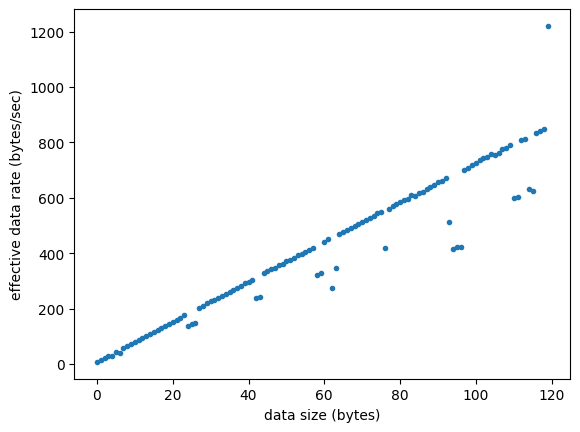

In [28]:
# calculate packet latency
packet_latency = np.subtract(recv_list, transmit_list)

# use latency to compute data rate (size / latency)
data_len = np.linspace(1,120,120)
data_rate = data_len / packet_latency

# plotting
plt.plot(data_rate,'.')
plt.xlabel('data size (bytes)')
plt.ylabel('effective data rate (bytes/sec)')
plt.show()

In [8]:
ble.stop_notify(ble.uuid['RX_STRING'])

#### E2

In [4]:
count = 0

In [5]:
def get_latency(uuid, byte_array):
    global count
    count = count + 1

In [6]:
ble.start_notify(ble.uuid['RX_STRING'], get_latency)

In [7]:
ble.send_command(CMD.SEND_NONSTOP_1k, '')

In [12]:
# latency set to 0 ms for maximum transmission rate
MAX_COUNT = 1000
print('anticipated count:', MAX_COUNT)
print('received count:   ', count)
print('reliability:      ', count/MAX_COUNT*100, '%')

anticipated count: 1000
received count:    1000
reliability:       100.0 %


In [13]:
ble.stop_notify(ble.uuid['RX_STRING'])

## Disconnect

In [112]:
# Disconnect
ble.disconnect()

2023-02-02 23:31:18,371 | INFO     |: Disconnected from C0:83:10:69:2C:3C
